In [1]:
%load_ext autoreload
import numpy as np

In [37]:
%autoreload
from supernet.model import SuperNet
from supernet.train import train_supernet_mnist

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


### 1. Train SuperNet and evaluate top-1 accuracy of sampled nets

In [4]:
training_settings = {'seed':1,
                     'batch_size':64,
                     'test_batch_size':1000,
                     'epochs':14,
                     'learning_rate':1.0,
                     'gamma':0.7,
                     'no_cuda':True,
                     'log_interval':50,
                     'save_model':True
                    }

In [5]:
top1_oneshot = np.array(train_supernet_mnist(SuperNet(), training_settings))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309939
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.544064
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.482952
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.336344
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.151749
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.346521
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.265048
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.098564
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.119935
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.118885
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.182263
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.272815
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.079951
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.099518
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.079761
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.110563
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.264445
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.021063
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.165807
Test set: Average loss: 0.1008, Accuracy: 9667/10000 (97%)


Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.007364
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.053363
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.026456
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.030157
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.006927
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.033433
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.005724
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.005719
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.001702
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.016789
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.110060
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.022970
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.009700
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.019425
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.007615
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.162365
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.033003
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.068619
Test set: Average loss: 0.0358, Accuracy: 9883/10000 (99%)
Test set: Average loss: 0.0330, Accuracy: 989

Test set: Average loss: 0.0295, Accuracy: 9900/10000 (99%)


<IPython.core.display.Javascript object>


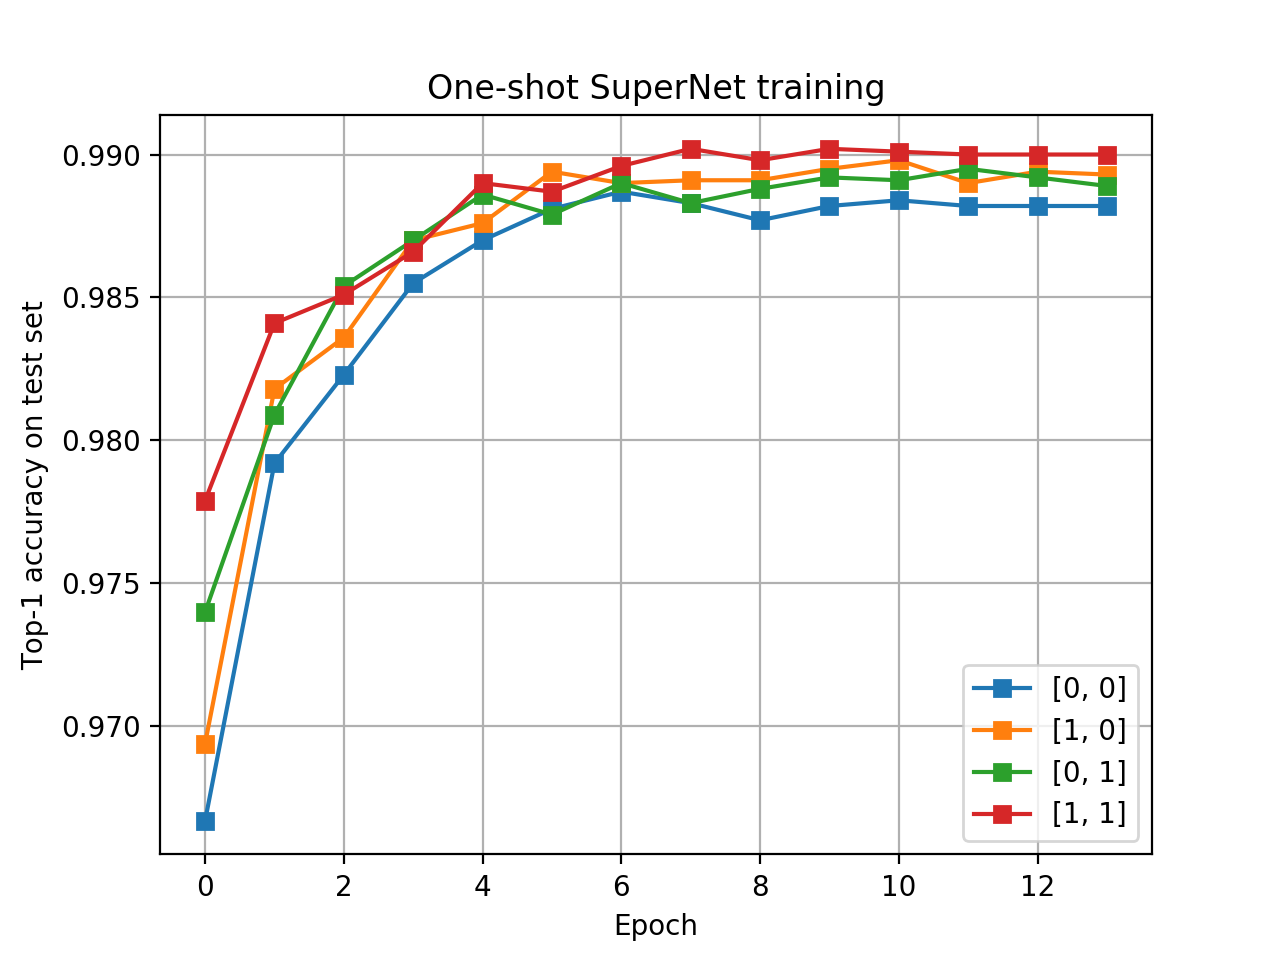

In [28]:
#mpl.style.use(['ggplot'])

fig, ax = plt.subplots()
ax.plot(top1_oneshot, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('One-shot SuperNet training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')
fig.savefig('figures/top1_sampled.png')

### 2. Train stand-alone subnets from scratch

In [33]:
top1_standalone = []
training_settings['epochs'] = 14
for k, subnet in enumerate([[0, 0], [1, 0], [0, 1], [1, 1]]):
    top1_standalone.append(train_supernet_mnist(SuperNet(), training_settings, subnet=subnet))

top1_standalone = np.array(top1_standalone)

new stuff

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.295186
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.186628
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.202448
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.094304
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.097826
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.122572
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.141484
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.044932
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.034265
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.061272
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.116378
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.162628
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.101029
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.050212
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.084737
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.050086
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.156214
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.023640
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.083944
Test set: Average loss: 0.0475, Accuracy: 9840/1

<IPython.core.display.Javascript object>


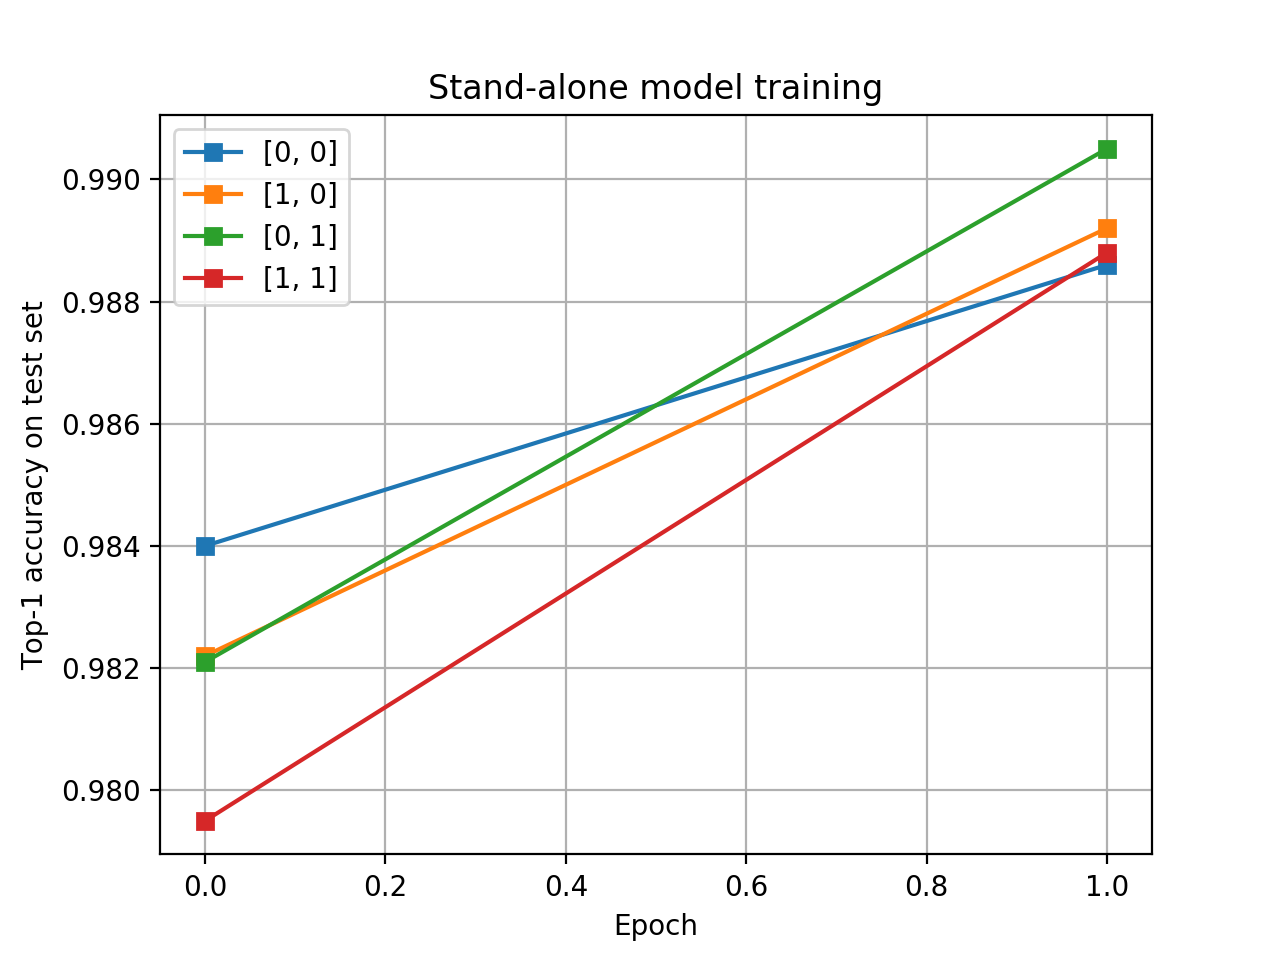

Text(0, 0.5, 'Top-1 accuracy on test set')

In [35]:
fig, ax = plt.subplots()
ax.plot(top1_standalone.T, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('Stand-alone model training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')

<IPython.core.display.Javascript object>


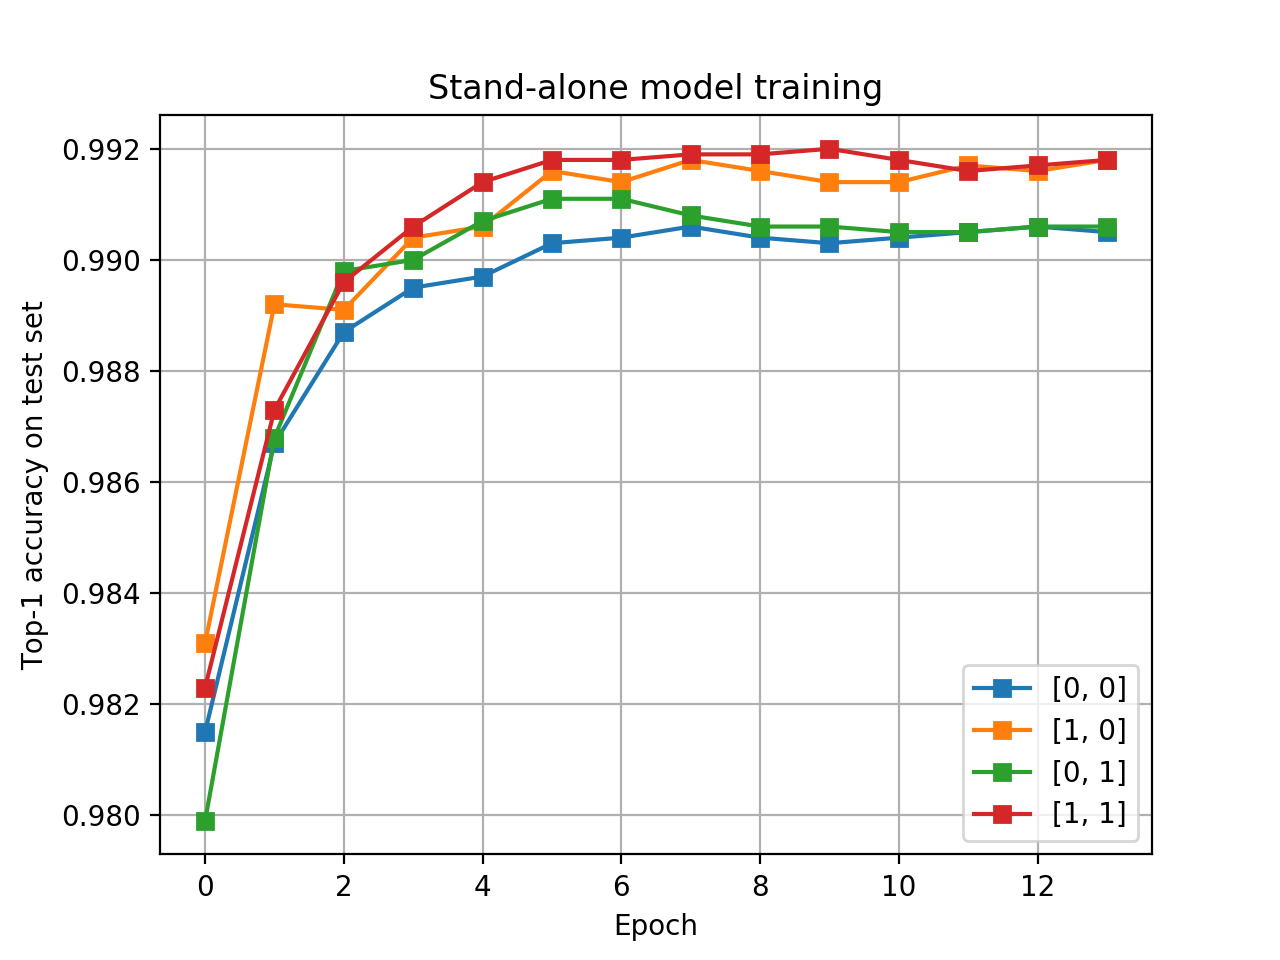

In [25]:
fig, ax = plt.subplots()
ax.plot(top1_standalone_subnets.T, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('Stand-alone model training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')
fig.savefig('figures/top1_standalone.png')

### 3. Evaluation
#### Is the one-shot trained subnet performance predictive of its stand-alone performance?

<IPython.core.display.Javascript object>


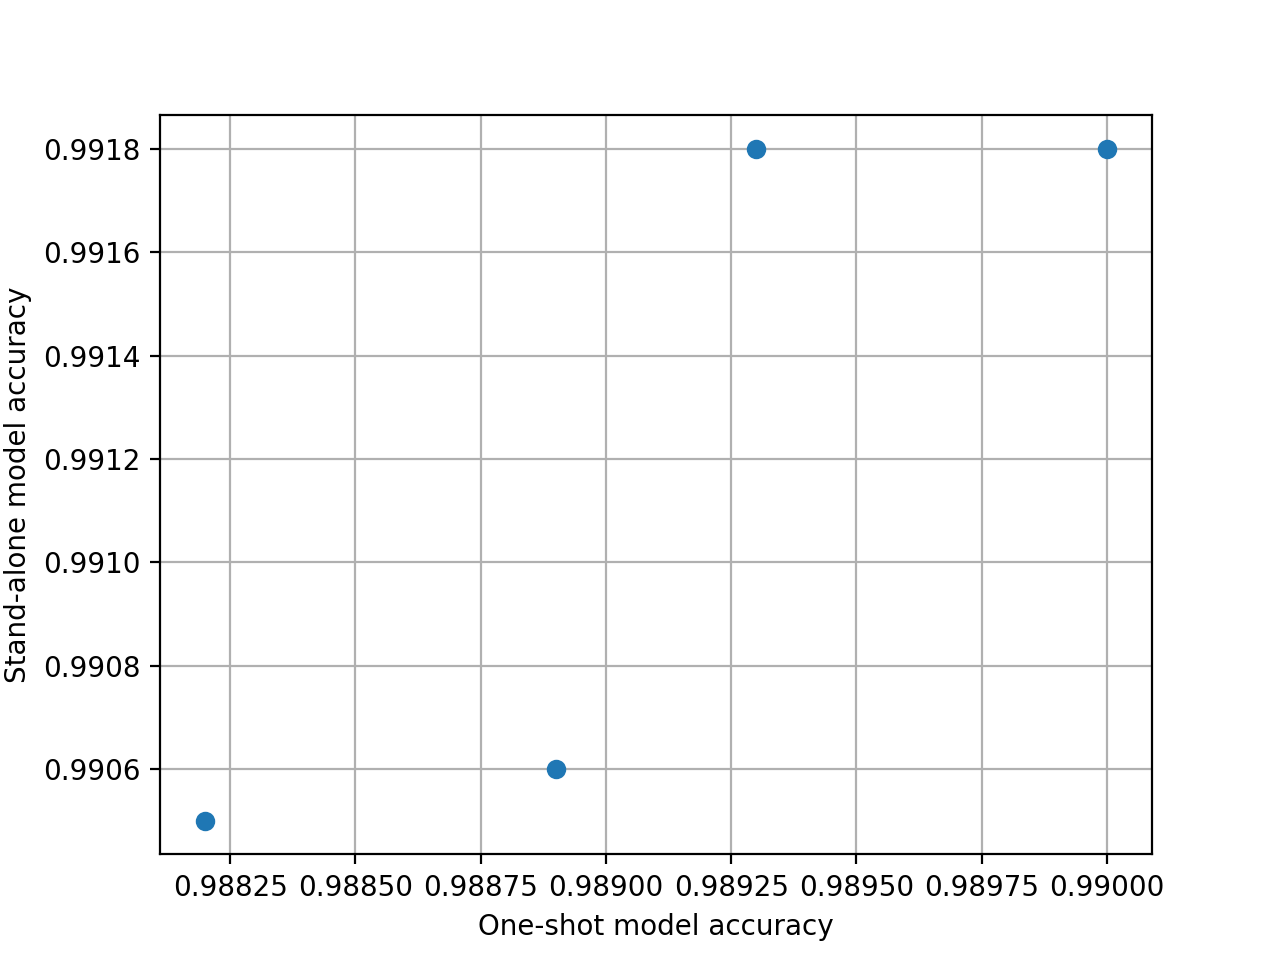

In [41]:
fig, ax = plt.subplots()
ax.plot(top1_sampled[-1,:], top1_standalone_subnets.T[-1,:], 'o')
ax.grid()
xlabel('One-shot model accuracy')
ylabel('Stand-alone model accuracy')
fig.savefig('figures/oneshot_v_standalone.png')

#### Does one-shot training produce consistent results?

We run one-shot training experiment several times to find out.

In [38]:
oneshot_acc_list = []
training_settings['epochs'] = 14
for s in range(1001, 1009):
    training_settings['seed'] = s
    oneshot_acc_list.append(train_supernet_mnist(SuperNet(), training_settings))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309911
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.931349
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.286478
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.178376
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.129252
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.503960
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.171120
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.124808
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.103111
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.156494
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.161535
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.180354
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.103466
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.089765
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.200350
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.307835
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.284773
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.036295
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.148875
Test set: Average loss: 0.0899, Accuracy: 9698/10000 (97%)


Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.001497
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.040067
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.012889
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.031336
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.009595
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.007583
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.001915
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.003105
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.004096
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.049892
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.158559
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.086759
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.015384
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.007031
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.011979
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.087783
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.021843
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.025395
Test set: Average loss: 0.0307, Accuracy: 9899/10000 (99%)
Test set: Average loss: 0.0300, Accuracy: 990

Test set: Average loss: 0.0284, Accuracy: 9913/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299121
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.741704
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.668649
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.369284
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.197844
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.446041
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.193693
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.144914
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.073057
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.177759
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.201711
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.235038
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.072232
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.118986
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.114330
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.078639
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.162568
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.026052
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.143351


Test set: Average loss: 0.0282, Accuracy: 9895/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.001675
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.012584
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.093121
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.057374
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.021377
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.016361
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.001474
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.001117
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.004355
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.006429
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.063760
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.086358
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.087195
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.024236
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.041611
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.003244
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.114754
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.023074
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.021709


Test set: Average loss: 0.0283, Accuracy: 9901/10000 (99%)
Test set: Average loss: 0.0268, Accuracy: 9916/10000 (99%)
Test set: Average loss: 0.0242, Accuracy: 9918/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302356
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.768189
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.356357
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.326251
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.216877
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.308623
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.308704
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.135056
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.090387
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.093313
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.100255
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.208437
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.118479
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.078038
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.154287
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.115034
Train Epoch: 1 [51200/60000 (85%

Test set: Average loss: 0.0287, Accuracy: 9901/10000 (99%)
Test set: Average loss: 0.0324, Accuracy: 9894/10000 (99%)
Test set: Average loss: 0.0292, Accuracy: 9903/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.006521
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.010259
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.129740
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.037485
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.031518
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.006982
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.025692
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.000786
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.002661
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.004129
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.037805
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.161220
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.043938
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.003580
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.045778
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.009166
Train Epoch: 8 [51200/60000 (85%

Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.035011
Test set: Average loss: 0.0302, Accuracy: 9892/10000 (99%)
Test set: Average loss: 0.0265, Accuracy: 9908/10000 (99%)
Test set: Average loss: 0.0290, Accuracy: 9905/10000 (99%)
Test set: Average loss: 0.0266, Accuracy: 9908/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307227
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.713707
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.370210
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.225674
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.193729
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.383813
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.323700
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.238026
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.136799
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.059309
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.147495
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.150678
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.101154
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.100005
Train Epoch: 1 [44800/

Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.099588
Test set: Average loss: 0.0345, Accuracy: 9889/10000 (99%)
Test set: Average loss: 0.0322, Accuracy: 9895/10000 (99%)
Test set: Average loss: 0.0303, Accuracy: 9910/10000 (99%)
Test set: Average loss: 0.0274, Accuracy: 9915/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.009970
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.002042
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.053309
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.214526
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.015374
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.003399
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.005842
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.002521
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.003862
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.001695
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.011172
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.063388
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.043749
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.004111
Train Epoch: 8 [44800/6

Train Epoch: 14 [51200/60000 (85%)]	Loss: 0.126325
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.019429
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.015603
Test set: Average loss: 0.0299, Accuracy: 9900/10000 (99%)
Test set: Average loss: 0.0288, Accuracy: 9893/10000 (99%)
Test set: Average loss: 0.0275, Accuracy: 9914/10000 (99%)
Test set: Average loss: 0.0257, Accuracy: 9917/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.293203
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.856186
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.351730
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.181728
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.144110
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.314001
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.430912
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.136849
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.062154
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.126274
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.258518
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.185276
Train Epoch: 1 [3840

Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.103326
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.023121
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.027107
Test set: Average loss: 0.0343, Accuracy: 9880/10000 (99%)
Test set: Average loss: 0.0316, Accuracy: 9894/10000 (99%)
Test set: Average loss: 0.0296, Accuracy: 9906/10000 (99%)
Test set: Average loss: 0.0284, Accuracy: 9904/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.006474
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.007022
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.098983
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.064559
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.023246
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.011604
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.003090
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.002707
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.007081
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.008791
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.041474
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.150513
Train Epoch: 8 [38400/6

Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.013783
Train Epoch: 14 [48000/60000 (80%)]	Loss: 0.025165
Train Epoch: 14 [51200/60000 (85%)]	Loss: 0.230086
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.021240
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.028495
Test set: Average loss: 0.0302, Accuracy: 9896/10000 (99%)
Test set: Average loss: 0.0277, Accuracy: 9902/10000 (99%)
Test set: Average loss: 0.0276, Accuracy: 9908/10000 (99%)
Test set: Average loss: 0.0271, Accuracy: 9907/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313077
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.517422
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.492759
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.236723
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.193310
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.449322
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.263092
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.153774
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.078487
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.098369
Train Epoch: 1 [32

Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.005334
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.068098
Train Epoch: 7 [48000/60000 (80%)]	Loss: 0.008399
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.164337
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.011728
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.048646
Test set: Average loss: 0.0335, Accuracy: 9892/10000 (99%)
Test set: Average loss: 0.0314, Accuracy: 9902/10000 (99%)
Test set: Average loss: 0.0310, Accuracy: 9896/10000 (99%)
Test set: Average loss: 0.0304, Accuracy: 9899/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.010407
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.001686
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.017767
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.014842
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.009140
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.016203
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.017609
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.005398
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.015652
Train Epoch: 8 [28800/6

Train Epoch: 14 [35200/60000 (59%)]	Loss: 0.101623
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.041013
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.005294
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.015721
Train Epoch: 14 [48000/60000 (80%)]	Loss: 0.006694
Train Epoch: 14 [51200/60000 (85%)]	Loss: 0.109691
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.041678
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.066211
Test set: Average loss: 0.0311, Accuracy: 9895/10000 (99%)
Test set: Average loss: 0.0291, Accuracy: 9912/10000 (99%)
Test set: Average loss: 0.0258, Accuracy: 9915/10000 (99%)
Test set: Average loss: 0.0254, Accuracy: 9917/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304605
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.679919
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.457506
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.138137
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.188121
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.357644
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.302377
Train Epoch: 1 

Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.010337
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.139618
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.052148
Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.001355
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.076302
Train Epoch: 7 [48000/60000 (80%)]	Loss: 0.006111
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.116497
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.012894
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.033679
Test set: Average loss: 0.0351, Accuracy: 9886/10000 (99%)
Test set: Average loss: 0.0337, Accuracy: 9896/10000 (99%)
Test set: Average loss: 0.0301, Accuracy: 9902/10000 (99%)
Test set: Average loss: 0.0306, Accuracy: 9895/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.015878
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.002409
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.017169
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.087125
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.031469
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.010438
Train Epoch: 8 [19200/6

Train Epoch: 14 [25600/60000 (43%)]	Loss: 0.009341
Train Epoch: 14 [28800/60000 (48%)]	Loss: 0.001398
Train Epoch: 14 [32000/60000 (53%)]	Loss: 0.001963
Train Epoch: 14 [35200/60000 (59%)]	Loss: 0.134354
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.022220
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.001533
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.069806
Train Epoch: 14 [48000/60000 (80%)]	Loss: 0.003517
Train Epoch: 14 [51200/60000 (85%)]	Loss: 0.074109
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.036788
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.010523
Test set: Average loss: 0.0308, Accuracy: 9888/10000 (99%)
Test set: Average loss: 0.0294, Accuracy: 9891/10000 (99%)
Test set: Average loss: 0.0279, Accuracy: 9908/10000 (99%)
Test set: Average loss: 0.0285, Accuracy: 9907/10000 (99%)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.320224
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.576969
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.479995
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.177777
Train Epoch:

Train Epoch: 7 [22400/60000 (37%)]	Loss: 0.001293
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.002569
Train Epoch: 7 [28800/60000 (48%)]	Loss: 0.002243
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.016457
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.089940
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.038449
Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.011192
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.022888
Train Epoch: 7 [48000/60000 (80%)]	Loss: 0.007012
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.065836
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.035785
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.087128
Test set: Average loss: 0.0340, Accuracy: 9891/10000 (99%)
Test set: Average loss: 0.0312, Accuracy: 9890/10000 (99%)
Test set: Average loss: 0.0265, Accuracy: 9899/10000 (99%)
Test set: Average loss: 0.0253, Accuracy: 9916/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.004512
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.014948
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.064743
Train Epoch: 8 [9600/6

Train Epoch: 14 [16000/60000 (27%)]	Loss: 0.007347
Train Epoch: 14 [19200/60000 (32%)]	Loss: 0.005854
Train Epoch: 14 [22400/60000 (37%)]	Loss: 0.000485
Train Epoch: 14 [25600/60000 (43%)]	Loss: 0.004169
Train Epoch: 14 [28800/60000 (48%)]	Loss: 0.002198
Train Epoch: 14 [32000/60000 (53%)]	Loss: 0.011471
Train Epoch: 14 [35200/60000 (59%)]	Loss: 0.119140
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.027463
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.001231
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.004499
Train Epoch: 14 [48000/60000 (80%)]	Loss: 0.005839
Train Epoch: 14 [51200/60000 (85%)]	Loss: 0.115774
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.022845
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.027364
Test set: Average loss: 0.0300, Accuracy: 9901/10000 (99%)
Test set: Average loss: 0.0268, Accuracy: 9912/10000 (99%)
Test set: Average loss: 0.0237, Accuracy: 9908/10000 (99%)
Test set: Average loss: 0.0228, Accuracy: 9924/10000 (99%)


In [40]:
np.array(oneshot_acc_list).shape

(8, 14, 4)

### 4. Alternative ways to build SuperNet with weight sharing

In [ ]:
from supernet.model import SuperNetSum, SuperNetConcat
